## HW 1

<p style="text-align: right;">Выполнила: <u>Растворова А.</u></p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('vodka.txt', sep=';')
data['mean'] = data['mean'] * 1000 / 46.069 # in mol
data.head()

,time,mean
0,0.083,1.367514
1,0.250,3.473051
2,0.500,5.643708
3,0.750,8.031431
4,1.000,9.985022


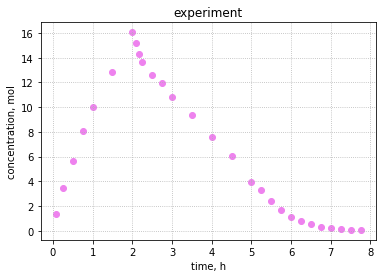

In [7]:
plt.title('experiment')
plt.xlabel("time, h")
plt.ylabel("concentration, mol")
plt.grid(ls=':')
plt.scatter(data['time'], data['mean'], color = 'violet')
plt.show()

In [8]:
n = 1000000
vl = 0.61 # liver
vb = 48 # body
fhv = 1.5 # the rate of flow
v_max = 2.75  
km = 0.1
dt = 0.0005

time = np.linspace(0, 8, n)
in_time = 120

qiv = 720 * 0.08 / in_time * 0.7893 / 46.069 * 1000 # ethanol input first 2 hours

cl = np.zeros([n])
cb = np.zeros([n])

for i in range(1, n):
    cl[i] = dt * ((fhv * (cb[i-1] - cl[i-1]) - v_max * (cl[i-1] / (km + cl[i-1]))) / vl) + cl[i-1]
    cb[i] = dt * ((fhv * (cl[i-1] - cb[i-1]) + (qiv if time[i] < 2 else 0)) / vb) + cb[i-1]

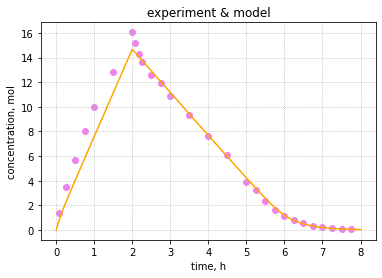

In [9]:
plt.title('experiment & model')
plt.xlabel("time, h")
plt.ylabel("concentration, mol")
plt.grid(ls=':')
plt.scatter(data['time'], data['mean'], color = 'violet')
plt.plot(time, cb, color = 'orange')
plt.show()

In [13]:
def calculate(ml):
    cb = np.zeros([n])
    cl = np.zeros([n])
    
    for i in range(1, n):
        qiv = (ml * 0.7893 / 46.069) if t[i-1] < 10 else 0
        
        cl[i] = (t[i] - t[i-1]) * ((fhv * (cb[i-1] - cl[i-1]) - v_max * (cl[i-1] / (km + cl[i-1]))) / vl) + cl[i-1]
        cb[i] = (t[i] - t[i-1]) * ((fhv * (cl[i-1] - cb[i-1]) + qiv) / vb) + cb[i-1]
    
    return cb[-1] * 1000

In [14]:
t = np.linspace(0, 180, n)
target = 6.5
less = 0
more = 400

while more - less > 0.01:
    ml = (less + more) / 2
    if calculate(ml) > target:
        more = ml
    else:
        less = ml
        
print("Maximum you can drink {:.2f} ml of vodka".format(ml))

Maximum you can drink 312.02 ml of vodka
